In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px

In [2]:
geo = pd.read_csv("D:\\Feynn-Labs\\cardetail.csv")

In [3]:
geo.head() 

Age        City Gender Education Level            Occupation  \
0    29    Kolkata   Male    Postgraduate  Working Professional   
1    29     Mumbai   Male        Graduate  Working Professional   
2    25     Mumbai   Male        Graduate  Working Professional   
3    25  Bangalore   Male        Graduate  Working Professional   
4    21     Mumbai   Male    Postgraduate               Student   

   Family Members  Annual Income  Charging Hours Electric Cars are economical  \
0               5         150000               1                          Yes   
1               4        1000000               1                          Yes   
2               4           5000               5                          Yes   
3               4         750000               1                   Don't know   
4               4           5000              12                   Don't know   

   Charging stations Convert your car to all electric Hybrid or Both  \
0                 15                              Yes     Hybrid car   
1                  8                              Yes   Electric car   
2                 15            Didn't think about it     Hybrid car   
3                  8            Didn't think about it     Hybrid car   
4                 15            Didn't think about it     Hybrid car   

   Next car will be electric car?  
0                               5  
1                               5  
2                               5  
3                               5  
4                               5

In [4]:
geo.Occupation.value_counts()

Occupation
Working Professional    230
Student                  60
Other                     9
Name: count, dtype: int64

In [5]:
geo['Electric Cars are economical'].value_counts()

Electric Cars are economical
Yes           222
Don't know     56
No             21
Name: count, dtype: int64

In [6]:
geo['Hybrid or Both'].value_counts()

Hybrid or Both
Hybrid car      206
Electric car     93
Name: count, dtype: int64

In [7]:
geo['Education Level'].value_counts()

Education Level
Graduate                     194
Postgraduate                  87
High School/ Intermediate      9
Above Postgraduate             9
Name: count, dtype: int64

# EDA ON DATASET

In [8]:
px.scatter(geo, x = 'Family Members', y = 'Annual Income')

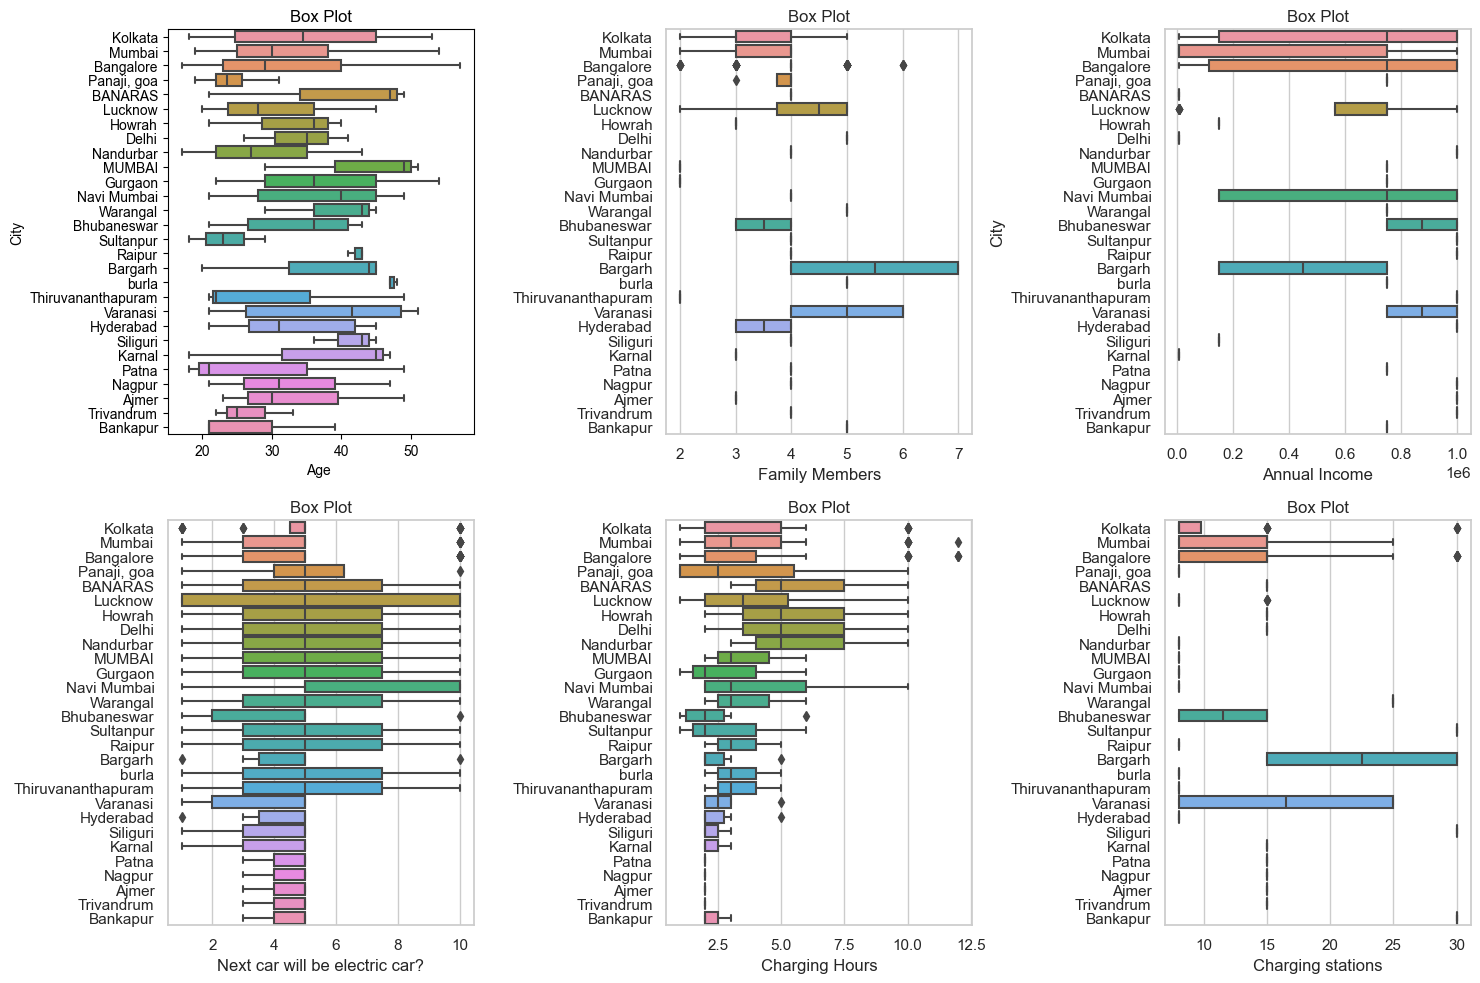

In [9]:
import seaborn as sns

plt.figure(figsize=(15, 10))
n = 0
for i, col in enumerate(['Age ', 'Family Members', 'Annual Income', 'Next car will be electric car?', 'Charging Hours', 'Charging stations'], 1):
    plt.subplot(2, 3, i)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.8, wspace=0.8)
    sns.boxplot(x=col, y='City', data=geo)
    plt.ylabel("City" if i == 1 or i == 3 else '')
    plt.title('Box Plot')

plt.tight_layout()
plt.show()

In [10]:
px.bar(geo.groupby('City')['Charging stations'].count(), title='Counts of Charging stations in different cities')

#### Bangalore has the most charging station implies usage/sales of EV is highest in Bangalore

In [14]:
px.scatter(geo, x = 'Next car will be electric car?', y='Annual Income', title = 'Annual Income Vs In How many Years next car be an electric')

#### As we see people from different income ranges have similar buying preferences on EV, Implies Person's Annual Income is not a major factor contributing towards sales of EV

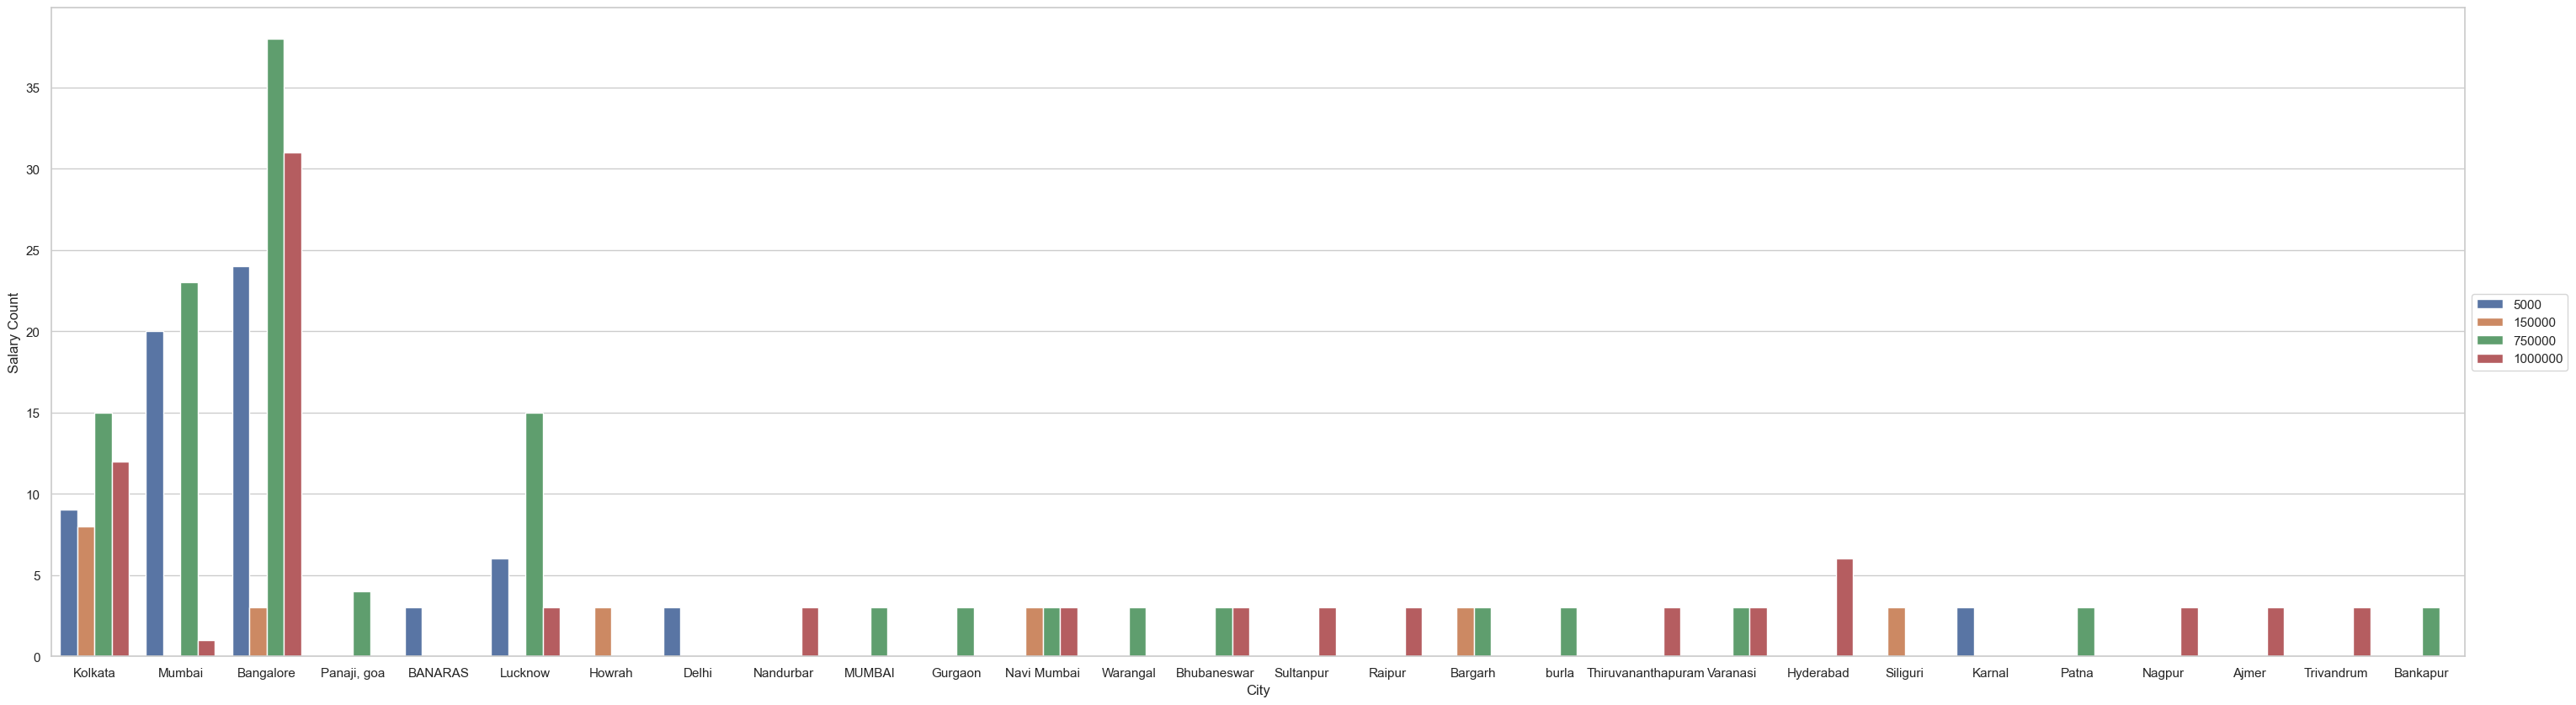

In [15]:
plt.figure(figsize=(37,10))
sns.countplot(x="City", data=geo, hue="Annual Income")
plt.ylabel('Salary Count')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### In Most to the top EV buying cities people with income range of 7-8 lakhs buys the most EV vehicles
#### People with Income range 1-2 lakhs per annum is the least interested familied towards EV

#### In Mumbai people's income > 10 lakhs also contributes least towards EV sales
#### Shockingly based on dataset people's income < 5000 also buys EV (Down payment mostly) which is understandable to avoid petrol cost

In [17]:
px.bar(geo.groupby('Convert your car to all electric')['Age '].median(), title = 'Median Age Vs Opinion on EV VEhicles')
# geo.groupby('Convert your car to all electric')['Age '].count()

### Apparently Youngers are more into EV - Vehicles Aged [25-33], people after 35 have no preference for buying an EV

In [18]:
fig = px.bar(geo.groupby('Occupation')['Next car will be electric car?'].mean())
fig.update_layout(yaxis_title='Avg Years to buy next EV')


In [19]:
px.pie(geo, names='City', title = 'Split of different cities in dataset')

In [21]:
px.bar(geo, x='Education Level', y='Charging stations')

#### As in the above inference youngsters doing an Undergraduate degree mostly buys EV - Vehicles

In [22]:
from sklearn.preprocessing import LabelEncoder

label_city = LabelEncoder()
label_gender = LabelEncoder()
label_edu = LabelEncoder()
label_occ = LabelEncoder()
label_ecars = LabelEncoder()
label_allecar = LabelEncoder()
label_hyb = LabelEncoder()

labels = [label_city, label_gender, label_edu, label_occ, label_ecars, label_allecar, label_hyb]

lst = ['City', 'Gender', 'Education Level', 'Occupation', 'Electric Cars are economical', 'Convert your car to all electric', 
                  'Hybrid or Both']

for i in range(len(lst)):
    geo[lst[i]] = labels[i].fit_transform(geo[lst[i]])

In [23]:
geo

Age   City  Gender  Education Level  Occupation  Family Members  \
0      29    11       2                3           2               5   
1      29    14       2                1           2               4   
2      25    14       2                1           2               4   
3      25     2       2                1           2               4   
4      21    14       2                3           1               4   
..    ...   ...     ...              ...         ...             ...   
294    19    14       2                1           2               4   
295    21     2       2                1           2               4   
296    23    18       2                1           2               3   
297    25    14       2                1           2               2   
298    29     2       2                1           2               4   

     Annual Income  Charging Hours  Electric Cars are economical  \
0           150000               1                             2   
1          1000000               1                             2   
2             5000               5                             2   
3           750000               1                             0   
4             5000              12                             0   
..             ...             ...                           ...   
294         750000               1                             2   
295         750000               1                             2   
296         750000               1                             2   
297         750000               1                             2   
298        1000000               1                             2   

     Charging stations  Convert your car to all electric  Hybrid or Both  \
0                   15                                 2               1   
1                    8                                 2               0   
2                   15                                 0               1   
3                    8                                 0               1   
4                   15                                 0               1   
..                 ...                               ...             ...   
294                  8                                 2               1   
295                 30                                 2               1   
296                  8                                 0               0   
297                 15                                 0               1   
298                  8                                 1               1   

     Next car will be electric car?  
0                                 5  
1                                 5  
2                                 5  
3                                 5  
4                                 5  
..                              ...  
294                               5  
295                               5  
296                               5  
297                               3  
298                               3  

[299 rows x 13 columns]

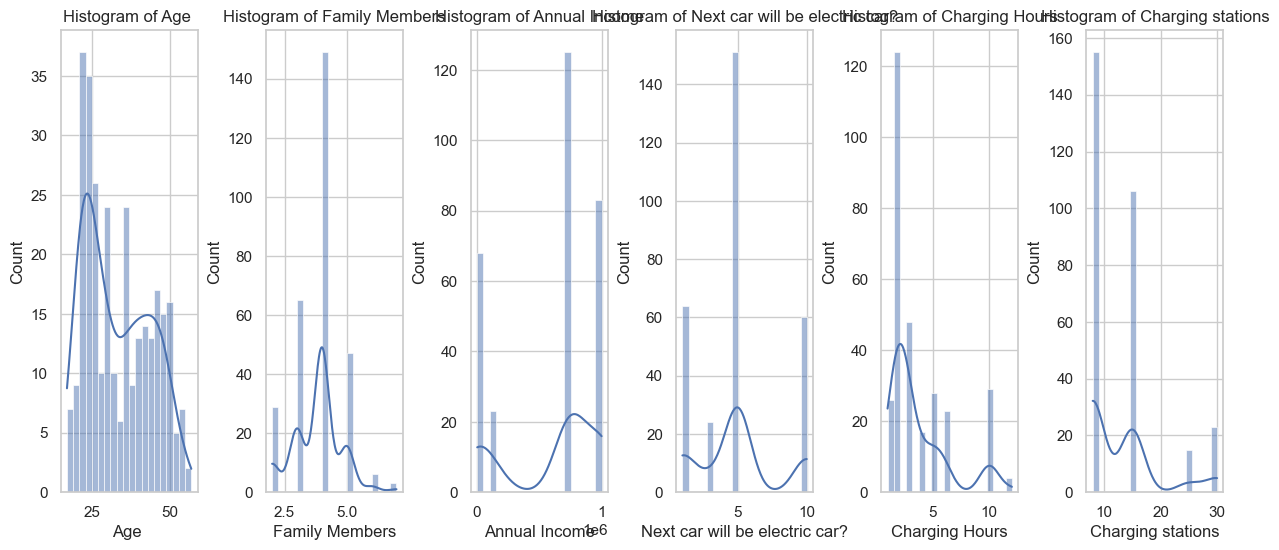

In [24]:
plt.figure(figsize=(15, 6))
n = 0
for x in ['Age ', 'Family Members', 'Annual Income', 'Next car will be electric car?', 'Charging Hours', 'Charging stations']:
    n += 1
    plt.subplot(1, 6, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(geo[x], kde=True, bins=20)
    plt.title('Histogram of {}'.format(x))
plt.show()

<Axes: >

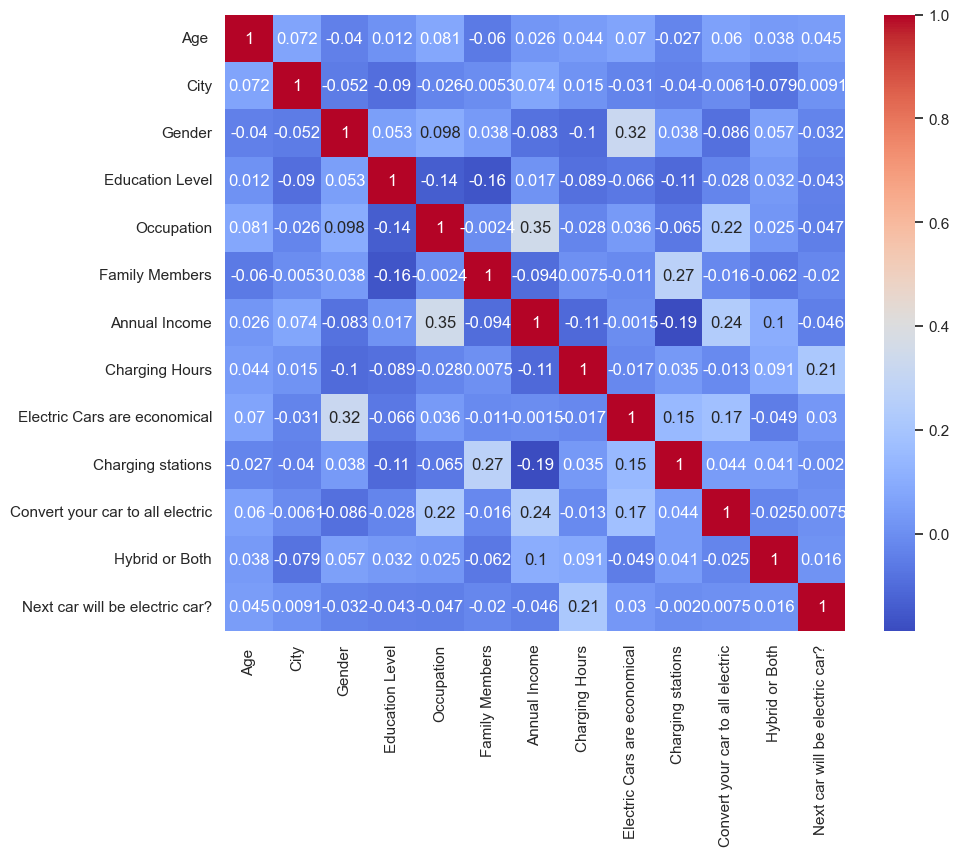

In [25]:
plt.figure(figsize=(10, 8))

sns.heatmap(geo.corr(), annot=True,cmap='coolwarm')

#### As we can see from the above inference variables are slightly corrrelated to each other
#### Highest linear positive relation is between Gender and Opinion on Electrical cars are ecoomical
#### Highest Negative relation is between charging station and Education Level (Implies Educated individual inclines more towards EV-Vehicles)

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



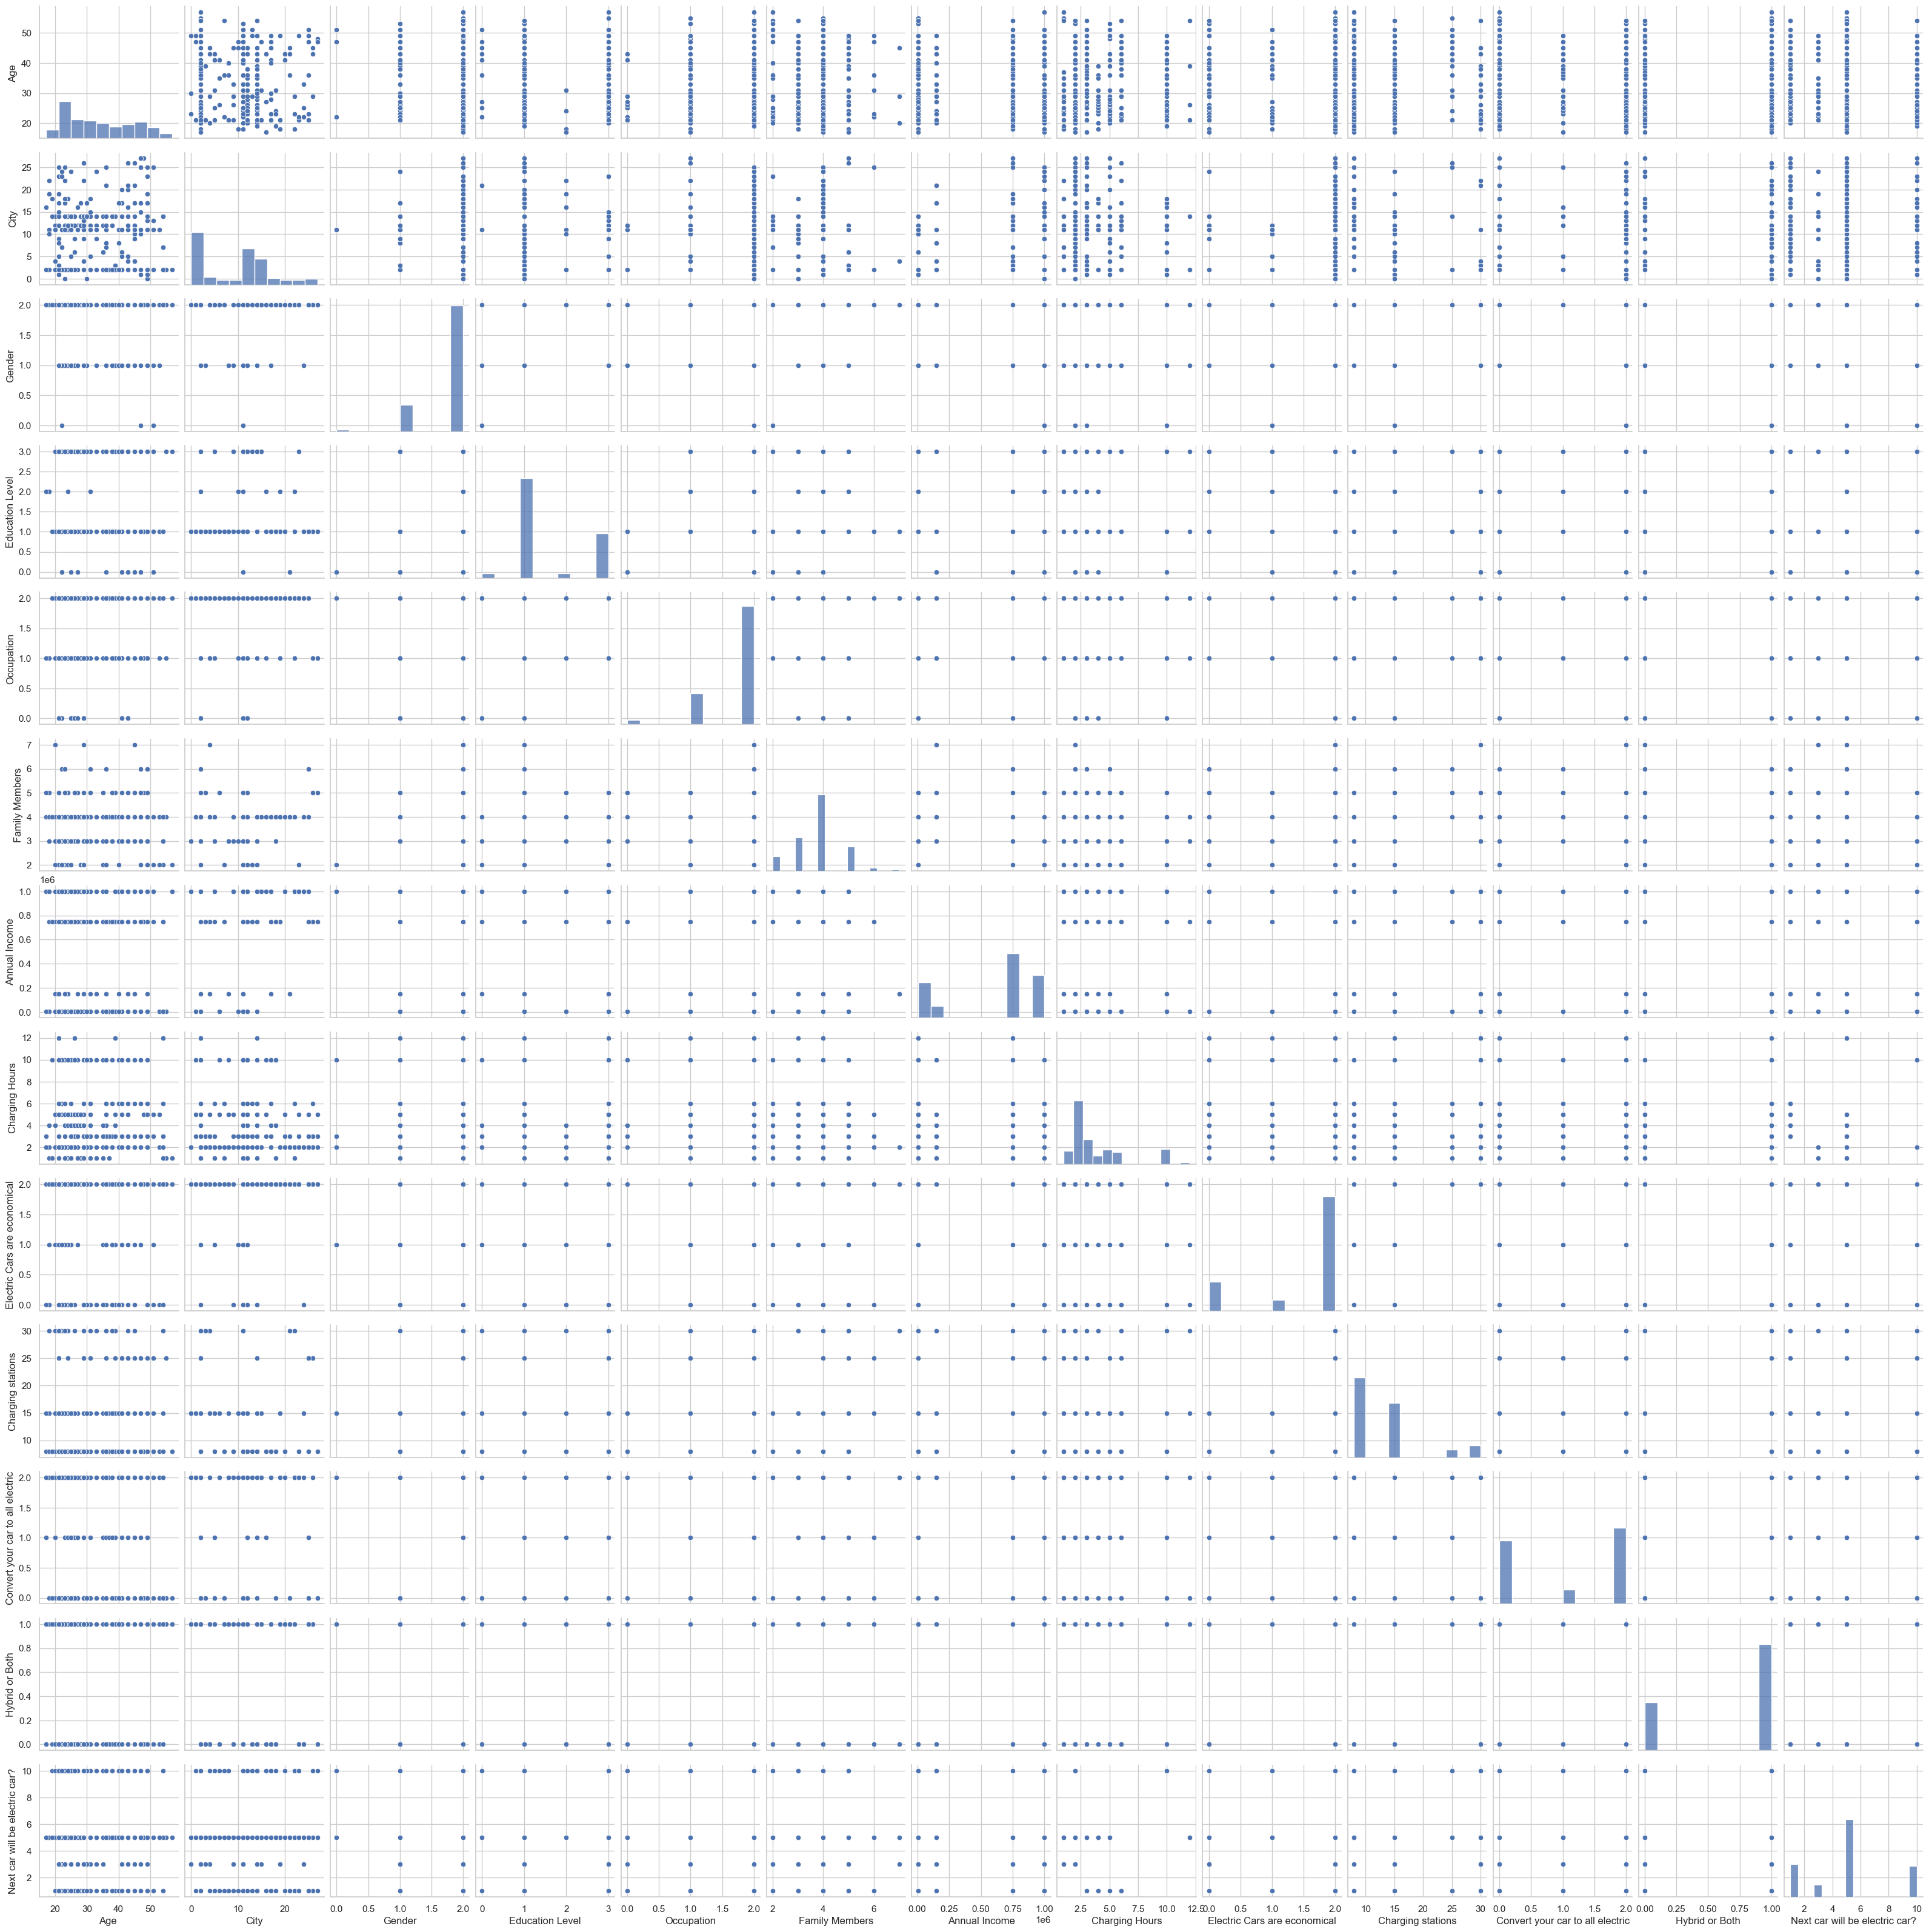

In [26]:
sns.pairplot(geo) # pair plot

In [27]:
geo

Age   City  Gender  Education Level  Occupation  Family Members  \
0      29    11       2                3           2               5   
1      29    14       2                1           2               4   
2      25    14       2                1           2               4   
3      25     2       2                1           2               4   
4      21    14       2                3           1               4   
..    ...   ...     ...              ...         ...             ...   
294    19    14       2                1           2               4   
295    21     2       2                1           2               4   
296    23    18       2                1           2               3   
297    25    14       2                1           2               2   
298    29     2       2                1           2               4   

     Annual Income  Charging Hours  Electric Cars are economical  \
0           150000               1                             2   
1          1000000               1                             2   
2             5000               5                             2   
3           750000               1                             0   
4             5000              12                             0   
..             ...             ...                           ...   
294         750000               1                             2   
295         750000               1                             2   
296         750000               1                             2   
297         750000               1                             2   
298        1000000               1                             2   

     Charging stations  Convert your car to all electric  Hybrid or Both  \
0                   15                                 2               1   
1                    8                                 2               0   
2                   15                                 0               1   
3                    8                                 0               1   
4                   15                                 0               1   
..                 ...                               ...             ...   
294                  8                                 2               1   
295                 30                                 2               1   
296                  8                                 0               0   
297                 15                                 0               1   
298                  8                                 1               1   

     Next car will be electric car?  
0                                 5  
1                                 5  
2                                 5  
3                                 5  
4                                 5  
..                              ...  
294                               5  
295                               5  
296                               5  
297                               3  
298                               3  

[299 rows x 13 columns]

In [28]:
from sklearn.cluster import KMeans

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Dell\AppData\Roaming\Python\Pyt

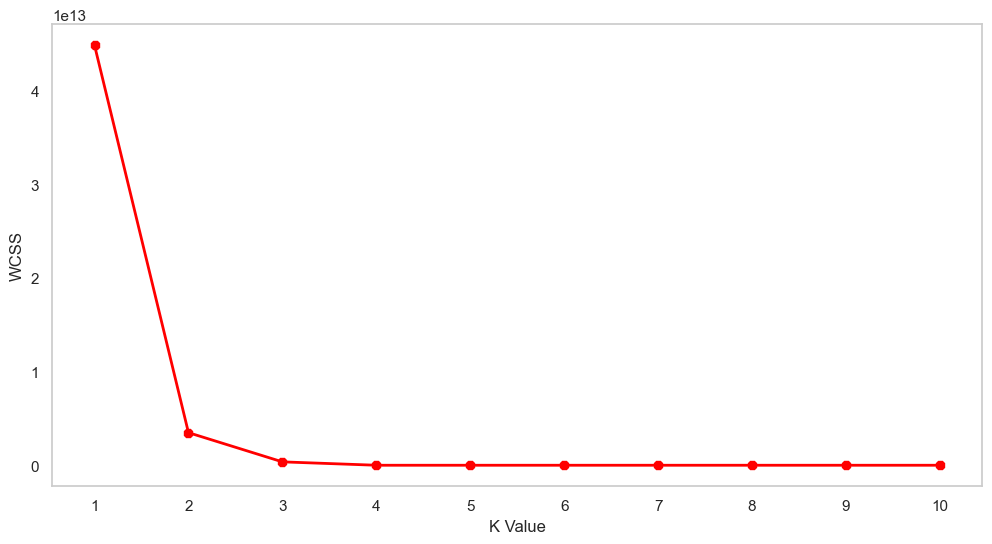

In [29]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state=28)
    kmeans.fit(geo)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

## THEREFORE NO OF OPTIMAL CLUSTER = 4

In [30]:
km = KMeans(n_clusters=4, random_state=28)
clusters = km.fit_predict(geo)
geo["Cluster"] = clusters

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [31]:
geo

Age   City  Gender  Education Level  Occupation  Family Members  \
0      29    11       2                3           2               5   
1      29    14       2                1           2               4   
2      25    14       2                1           2               4   
3      25     2       2                1           2               4   
4      21    14       2                3           1               4   
..    ...   ...     ...              ...         ...             ...   
294    19    14       2                1           2               4   
295    21     2       2                1           2               4   
296    23    18       2                1           2               3   
297    25    14       2                1           2               2   
298    29     2       2                1           2               4   

     Annual Income  Charging Hours  Electric Cars are economical  \
0           150000               1                             2   
1          1000000               1                             2   
2             5000               5                             2   
3           750000               1                             0   
4             5000              12                             0   
..             ...             ...                           ...   
294         750000               1                             2   
295         750000               1                             2   
296         750000               1                             2   
297         750000               1                             2   
298        1000000               1                             2   

     Charging stations  Convert your car to all electric  Hybrid or Both  \
0                   15                                 2               1   
1                    8                                 2               0   
2                   15                                 0               1   
3                    8                                 0               1   
4                   15                                 0               1   
..                 ...                               ...             ...   
294                  8                                 2               1   
295                 30                                 2               1   
296                  8                                 0               0   
297                 15                                 0               1   
298                  8                                 1               1   

     Next car will be electric car?  Cluster  
0                                 5        3  
1                                 5        2  
2                                 5        1  
3                                 5        0  
4                                 5        1  
..                              ...      ...  
294                               5        0  
295                               5        0  
296                               5        0  
297                               3        0  
298                               3        2  

[299 rows x 14 columns]

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
clusters_pc = pca.fit_transform(geo)

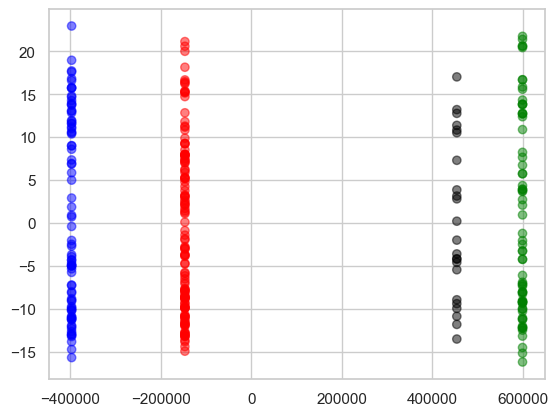

In [33]:
LABEL_COLOR_MAP = {0 : 'red',1 : 'green',2 : 'blue', 3:'black', 4:'grey', 5:'pink', 6:'purple', 7:'orange', 8:'yellow', 9:'lightseagreen', 10:'#F39C12', 11:'brown'}
label_color = [LABEL_COLOR_MAP[l] for l in clusters] 
plt.scatter(clusters_pc[:,0],clusters_pc[:,1], c= label_color, alpha=0.5)

# INFERENCES ON MARKET SEGMENTS

In [34]:
geo.Cluster.value_counts()

Cluster
0    125
2     83
1     68
3     23
Name: count, dtype: int64

### More number of samples have been segmented into cluster-0 and least into cluster-3

In [35]:
Cluster_0 = geo[geo.Cluster==0]
Cluster_1 = geo[geo.Cluster==1]
Cluster_2 = geo[geo.Cluster==2]
Cluster_3 = geo[geo.Cluster==3]

In [37]:
box0 = px.box(Cluster_0, y='Age ', title = 'Age in cluster-0')
box1 = px.box(Cluster_1, y='Age ', title = 'Age in cluster-1')
box2 = px.box(Cluster_2, y='Age ', title = 'Age in cluster-2')
box3 = px.box(Cluster_3, y='Age ', title = 'Age on cluster-3')

box0.show()
box1.show()
box2.show()
box3.show()


#### Targetting age in cluster-0 should be 18-54
#### Targetting age in cluster-0 should be 17-55
#### Targetting age in cluster-0 should be 17-57
#### Targetting age in cluster-0 should be 20-49

In [38]:
print('CLUSTER - 0\n')
print(pd.DataFrame(label_city.inverse_transform(Cluster_0['City'])).value_counts()[:3], '\n')
print('CLUSTER - 1\n')
print(pd.DataFrame(label_city.inverse_transform(Cluster_1['City'])).value_counts()[:3], '\n')
print('CLUSTER - 2\n')
print(pd.DataFrame(label_city.inverse_transform(Cluster_2['City'])).value_counts()[:3], '\n')
print('CLUSTER - 3\n')
print(pd.DataFrame(label_city.inverse_transform(Cluster_3['City'])).value_counts()[:3], '\n')

CLUSTER - 0

Bangalore    38
Mumbai       23
Kolkata      15
Name: count, dtype: int64 

CLUSTER - 1

Bangalore    24
Mumbai       20
Kolkata       9
Name: count, dtype: int64 

CLUSTER - 2

Bangalore    31
Kolkata      12
Hyderabad     6
Name: count, dtype: int64 

CLUSTER - 3

Kolkata      8
Bangalore    3
Bargarh      3
Name: count, dtype: int64 



### As we see in our inference the most optimal place to setup an EV-startup is 
#### 1 - Bangalore
#### 2 - Kolkata
#### 3 - Mumbai

In [39]:
print('CLUSTER - 0\n')
print(pd.DataFrame(label_edu.inverse_transform(Cluster_0['Education Level'])).value_counts()[:3], '\n')
print('CLUSTER - 1\n')
print(pd.DataFrame(label_edu.inverse_transform(Cluster_1['Education Level'])).value_counts()[:3], '\n')
print('CLUSTER - 2\n')
print(pd.DataFrame(label_edu.inverse_transform(Cluster_2['Education Level'])).value_counts()[:3], '\n')
print('CLUSTER - 3\n')
print(pd.DataFrame(label_edu.inverse_transform(Cluster_3['Education Level'])).value_counts()[:3], '\n')




CLUSTER - 0

Graduate                     88
Postgraduate                 30
High School/ Intermediate     4
Name: count, dtype: int64 

CLUSTER - 1

Graduate                     46
Postgraduate                 19
High School/ Intermediate     3
Name: count, dtype: int64 

CLUSTER - 2

Graduate              48
Postgraduate          30
Above Postgraduate     3
Name: count, dtype: int64 

CLUSTER - 3

Graduate              12
Postgraduate           8
Above Postgraduate     3
Name: count, dtype: int64 



### Usually 'GRADUATES' are most interested into EV and 'POST GRADUATES' and 'HIGH SCHOOLERS' are least interested

In [40]:
print('CLUSTER - 0')
print('MEAN INCOME : ', np.mean(Cluster_0['Annual Income']), '\n')
print('CLUSTER - 1')
print('MEAN INCOME : ', np.mean(Cluster_1['Annual Income']), '\n')
print('CLUSTER - 2')
print('MEAN INCOME : ', np.mean(Cluster_2['Annual Income']), '\n')
print('CLUSTER - 3')
print('MEAN INCOME : ', np.mean(Cluster_3['Annual Income']), '\n')

CLUSTER - 0
MEAN INCOME :  750000.0 

CLUSTER - 1
MEAN INCOME :  5000.0 

CLUSTER - 2
MEAN INCOME :  1000000.0 

CLUSTER - 3
MEAN INCOME :  150000.0 



### Cluster-2 has people with highest mean income and cluster-1 has the least

### People with Income 7-8 lakhs per annum (Middle Class) are most likely to get an EV
### And people with Income < 2 lakhs are least buyers of EV
### And poeple with Income > 10 lakhs are decent buyers with an influence of other factors on their buying

In [41]:
print('CLUSTER - 0\n')
print('FAMILY SIZE : ', Cluster_0['Family Members'].value_counts()[:3], '\n')

print('CLUSTER - 1\n')
print('FAMILY SIZE : ', Cluster_1['Family Members'].value_counts()[:3], '\n')

print('CLUSTER - 2\n')
print('FAMILY SIZE : ', Cluster_2['Family Members'].value_counts()[:3], '\n')

print('CLUSTER - 3\n')
print('FAMILY SIZE : ', Cluster_3['Family Members'].value_counts()[:3], '\n')

CLUSTER - 0

FAMILY SIZE :  Family Members
4    53
3    28
5    27
Name: count, dtype: int64 

CLUSTER - 1

FAMILY SIZE :  Family Members
4    37
3    13
5    12
Name: count, dtype: int64 

CLUSTER - 2

FAMILY SIZE :  Family Members
4    47
3    18
2    12
Name: count, dtype: int64 

CLUSTER - 3

FAMILY SIZE :  Family Members
4    12
3     6
7     3
Name: count, dtype: int64 



### Generally Families with 4 and 3 members should be targeted followed by 5 members